In [1]:
pip install opencv-python opencv-contrib-python matplotlib

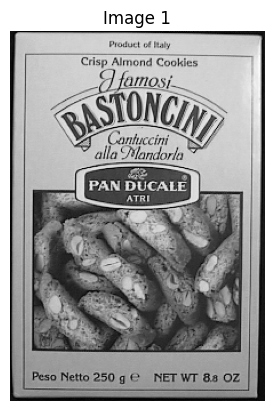

(np.float64(-0.5), np.float64(511.5), np.float64(383.5), np.float64(-0.5))

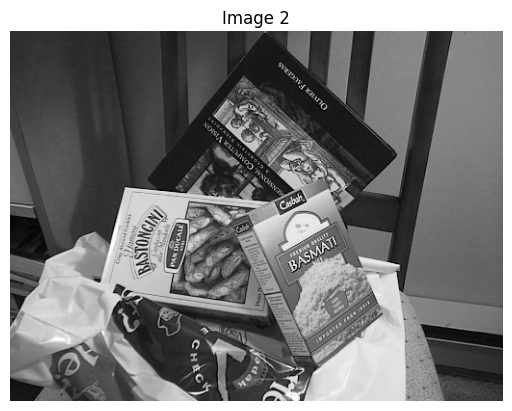

In [3]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('/content/box.png', 0)
img2 = cv2.imread('/content/box_in_scene.png', 0)
plt.imshow(img1, cmap='gray')
plt.title("Image 1")
plt.axis('off')
plt.show()
plt.imshow(img2, cmap='gray')
plt.title("Image 2")
plt.axis('off')

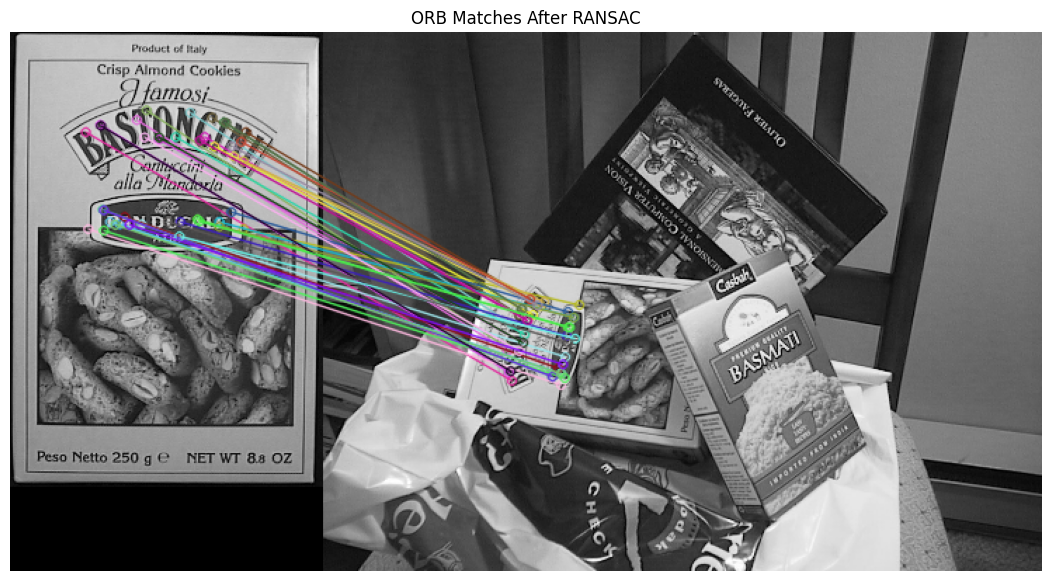

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img1 = cv2.imread('box.png', 0)
img2 = cv2.imread('box_in_scene.png', 0)


orb = cv2.ORB_create(nfeatures=1000)


kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)


bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)


matches = bf.knnMatch(des1, des2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)


img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)
cv2.imwrite("orb_matches_before_ransac.jpg", img_matches)


if len(good_matches) > 4:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)


    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()


    ransac_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None,
                                     matchesMask=matchesMask,
                                     flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    cv2.imwrite("orb_matches_after_ransac.jpg", ransac_matches)

    plt.figure(figsize=(14, 7))
    plt.imshow(ransac_matches)
    plt.title("ORB Matches After RANSAC")
    plt.axis('off')
    plt.show()
else:
    print("Not enough matches found for RANSAC.")